In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


Graphics of your choosing to display the repartitions between the different types of bugs (using the columns “bug type” and “species” from the Excel File) 

In [2]:
# Load the data from the Excel file
data = pd.read_excel('../classif.xlsx')

# Display the first few rows of the dataframe to understand its structure
print(data.head())
print(data.dtypes)

   ID bug type         species
0   1      Bee  Apis mellifera
1   2      Bee  Apis mellifera
2   3      Bee  Apis mellifera
3   4      Bee  Apis mellifera
4   5      Bee  Apis mellifera
ID           int64
bug type    object
species     object
dtype: object


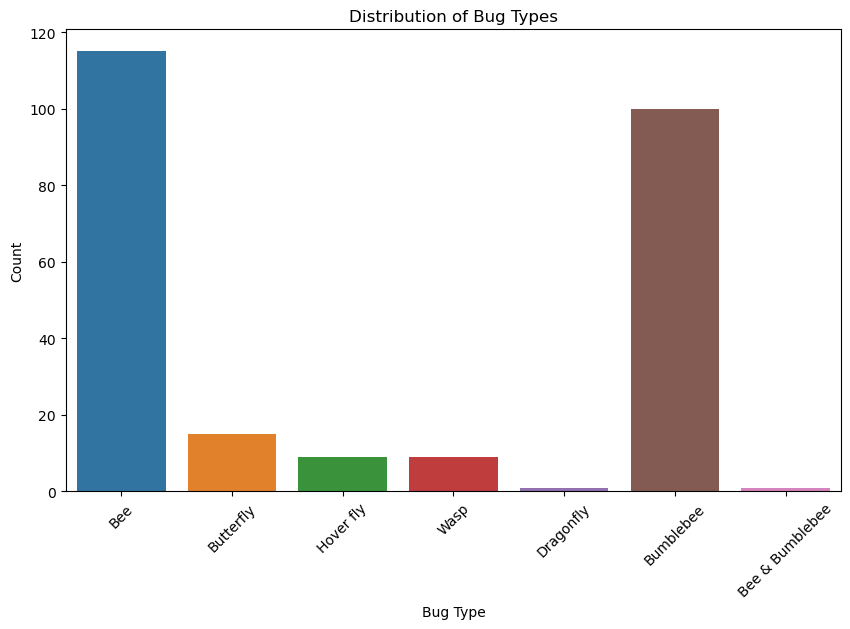

In [3]:
# Example 1: Bar Chart for Bug Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='bug type', data=data)
plt.title('Distribution of Bug Types')
plt.xlabel('Bug Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating the x labels for better readability
plt.show()



In [4]:
#Pie Chart for Species Distribution
# Calculate species counts
species_counts = data['species'].value_counts()

# Calculate 5% of the total
total = species_counts.sum()
five_percent = total * 0.05

In [5]:
# Filter species by 5% threshold and group others as 'Other'
filtered_species_counts = species_counts[species_counts >= five_percent]
other_species_count = species_counts[species_counts < five_percent].sum()

# If there are any species in the 'Other' category, add it
if other_species_count > 0:
    filtered_species_counts['Other'] = other_species_count


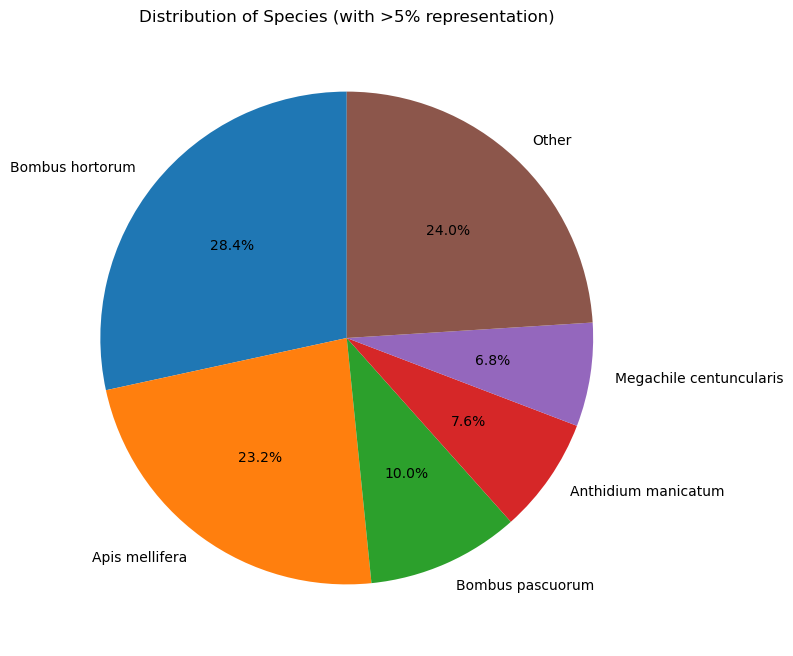

In [6]:
# Pie Chart for Species Distribution with 'Other' category
plt.figure(figsize=(8, 8))
plt.pie(filtered_species_counts, labels=filtered_species_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Species (with >5% representation)')
plt.show()


A PCA projection of the features into 2 dimensions

In [7]:
# Define a function to encode categories with frequencies above 5%
def encode_frequent_categories(data, column_name):
    # Calculate the frequency of each category
    frequency = data[column_name].value_counts(normalize=True)
    # Categories above 5% threshold
    frequent_categories = frequency[frequency > 0.05].index
    # Map each category to a number, less frequent categories grouped as 'Other'
    category_to_number = {category: idx + 1 for idx, category in enumerate(frequent_categories)}
    # Assign all other less frequent categories to 'Other'
    category_to_number.update({category: 0 for category in frequency.index if category not in frequent_categories})
    # Replace the categories in the dataframe with their assigned numbers
    return data[column_name].map(category_to_number)

# Encode 'bug type' and 'species'
data['bug type'] = encode_frequent_categories(data, 'bug type')
data['species'] = encode_frequent_categories(data, 'species')

# Print all unique values and their counts in the 'bug type' column
print("Encoded bug type Values and their Counts:")
print(data['bug type'].value_counts())

# Print all unique values and their counts in the 'species' column
print("Encoded Species Values and their Counts:")
print(data['species'].value_counts())

# Display the modified DataFrame
print(data.sample(10))  # Randomly select and show 10 rows, to be sure that it's well encoded.


Encoded bug type Values and their Counts:
bug type
1    115
2    100
0     20
3     15
Name: count, dtype: int64
Encoded Species Values and their Counts:
species
1    71
0    60
2    58
3    25
4    19
5    17
Name: count, dtype: int64
      ID  bug type  species
141  142         2        3
200  201         2        0
196  197         1        4
208  209         2        1
188  189         3        0
138  139         2        3
195  196         1        4
189  190         2        1
244  245         1        2
205  206         1        2


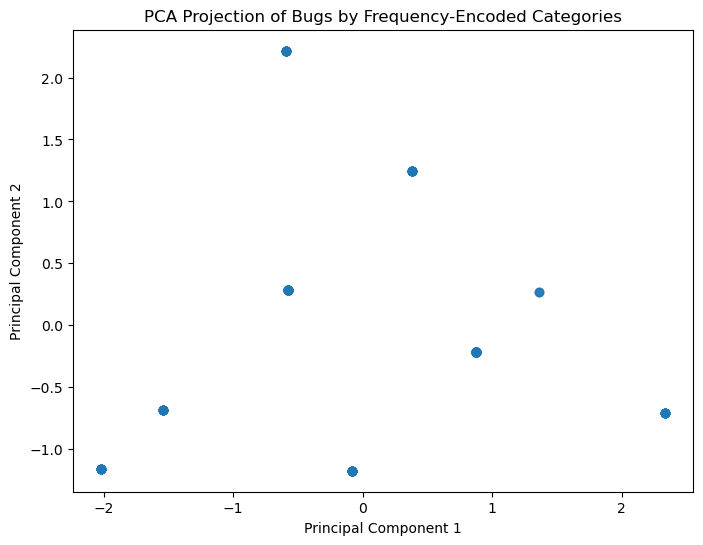

In [8]:


# Now, standardize the numeric data (excluding 'ID' as it is an identifier)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['bug type', 'species']])  # Assuming these are the only features now

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Plotting the PCA result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Bugs by Frequency-Encoded Categories')
plt.show()

At least 2 other projections of your features using non-linear methods

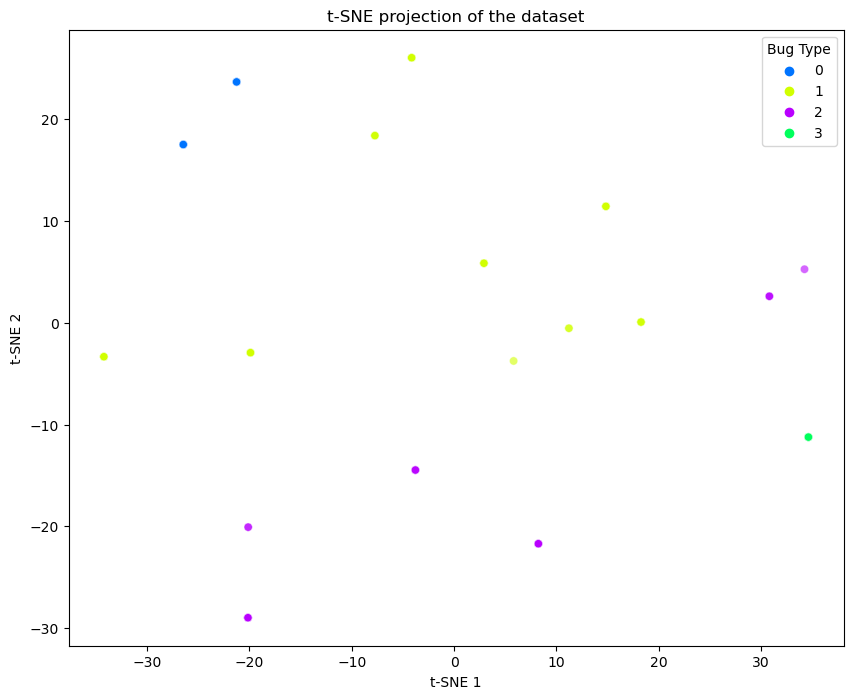

In [10]:
from sklearn.manifold import TSNE
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(data_scaled)

# Create a DataFrame for plotting
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE-1', 'TSNE-2'])
tsne_df['bug type'] = data['bug type']  # Ensure 'bug type' is the categorical label from your original data

# Use seaborn to create a color palette and plot with labels
palette = sns.color_palette("hsv", len(tsne_df['bug type'].unique()))  # 'hsv' is a good color map for distinct colors
color_map = {category: color for category, color in zip(tsne_df['bug type'].unique(), palette)}

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE-1', y='TSNE-2', hue='bug type', data=tsne_df, palette=color_map, legend='full', alpha=0.6)
plt.title('t-SNE projection of the dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Bug Type')
plt.show()